In [1]:
import wandb
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [4]:
#not using this
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run_id>
run = api.run("aaronwtr/perturbench/0xb7ldld")

# save the metrics for the run to a csv file
metrics_dataframe = run.history()
#metrics_dataframe.to_csv("metrics.csv")

In [5]:
df = pd.read_csv('wandb_baseline.csv')
df

,Name,Group,Tags,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse
0,solar-frost-234,test_mlp_norman_0.8,"ZNF318_de, eval, mlp, norman, split_0.8",NaN,0.346288,0.382098,NaN,NaN
1,electric-snow-233,test_mlp_norman_0.8,"ARID1A_de, eval, mlp, norman, split_0.8",NaN,0.418276,0.436666,NaN,NaN
2,northern-cherry-232,test_mlp_norman_0.0,"SLC4A1_de, eval, mlp, norman, split_0.0",NaN,0.383467,0.387734,NaN,NaN
3,light-music-231,test_mlp_norman_0.0,"SET_de, eval, mlp, norman, split_0.0",NaN,0.300423,0.322280,NaN,NaN
4,prime-disco-230,mlp_norman_0.8,"mlp, norman, replicate_1, split_0.8",0.071544,NaN,NaN,0.060080,0.057698
5,eternal-sun-229,mlp_norman_0.8,"mlp, norman, replicate_0, split_0.8",0.063389,NaN,NaN,0.075439,0.076257
6,neat-thunder-228,mlp_norman_0.8,"mlp, norman, replicate_2, split_0.8",0.055903,NaN,NaN,0.070466,0.068508
7,jumping-star-227,mlp_norman_0.7,"mlp, norman, replicate_1, split_0.7",0.079012,NaN,NaN,0.060670,0.061176
8,sunny-energy-226,mlp_norman_0.7,"mlp, norman, replicate_0, split_0.7",0.091801,NaN,NaN,0.053304,0.054581
9,ruby-vortex-225,mlp_norman_0.7,"mlp, norman, replicate_2, split_0.7",0.083972,NaN,NaN,0.056957,0.058735


plt.style.use("seaborn")

In [142]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        sp_sub = df[df['Group'] == f'{model}_{sp}']
        met_by_sp[f'{model}_{sp}'] = sp_sub[metric_name].values
    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = test_mse.mean()
    return auc(x, y)

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True):
    x = np.array(spectral_params, dtype='float')
    y = test_mse.mean()
    if err == 'standard_error':
        yerr = test_mse.std() / (len(test_mse) ** 0.5 ) #Standard error for err bar 
    
    #plt.ylim(ymin=0.0, ymax=0.09)
    if errbar:
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        plt.plot(x, y, color='k', linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color='#D1E7FF', alpha=0.8, edgecolor='#aad3ff')
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    plt.show()

In [143]:
model = 'mlp_norman' #as named in Group col in df above
metric_name  = 'test/mse' #name of col for metric of intrest
test_mse = find_mets_by_spectral_params(model, metric_name)
find_spectral_auc(test_mse)

0.04582182324180996

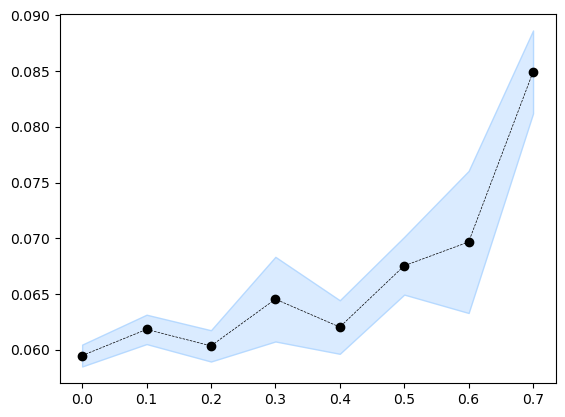

In [144]:
plot_spectral_curve(test_mse, shading=False, errbar=False)

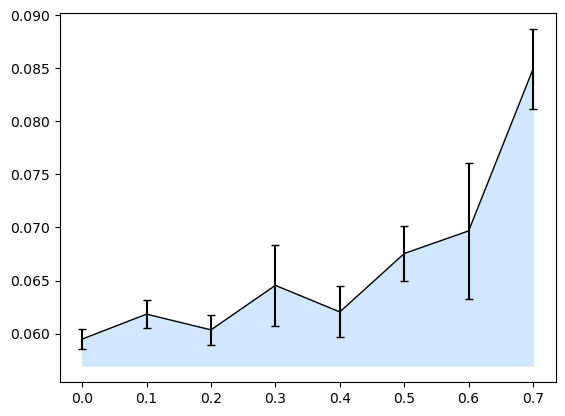

In [55]:
plot_spectral_curve(test_mse, errbar=True)

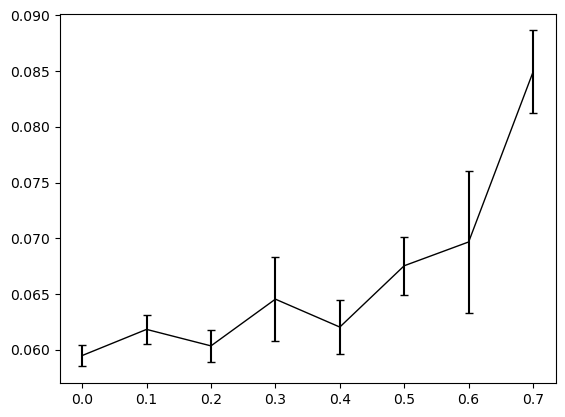

NameError: name 'x' is not defined

In [58]:
plot_spectral_curve(test_mse, shading=False)
plt.fill_between(x, y_lower, y_upper, color='gray', alpha=0.5, label='Uncertainty')

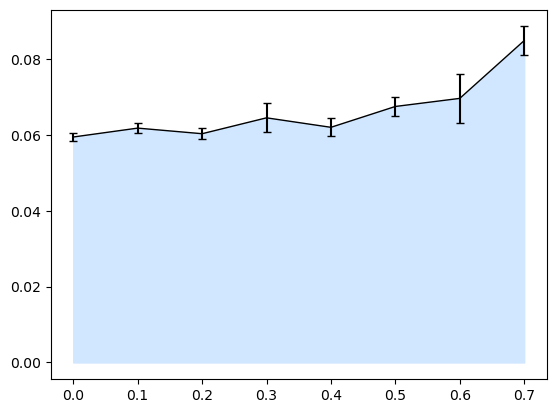

In [44]:
plot_spectral_curve(test_mse, zero_ylb=True)

In [204]:
test_mse

,mlp_norman_0.0,mlp_norman_0.1,mlp_norman_0.2,mlp_norman_0.3,mlp_norman_0.4,mlp_norman_0.5,mlp_norman_0.6,mlp_norman_0.7
0,0.061361,0.062443,0.058599,0.058564,0.057788,0.072450,NaN,0.079012
1,0.058050,0.063751,0.063129,0.071585,0.062256,0.066525,0.061875,0.091801
2,0.059055,0.059312,0.059340,0.063496,0.066094,0.063661,0.077482,0.083972
